In [43]:
import pandas as pd
import os 

# data = pd.read_csv('PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/combined_mismatch_results.csv')
# data

In [44]:
# all_csv_path = 'PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/tmp_dataframes1'
all_csv_path = 'PyFstat_example_data/PyFstatExampleSimpleMCMCvsGridComparisonSemi/tmp_dataframes'
all_csv_files = [f for f in os.listdir(all_csv_path) if f.endswith('.csv')] 
# Initialize an empty DataFrame to hold all data
data = pd.read_csv('data/combined_mismatch_results_20250611_192000.csv')
# data = pd.DataFrame()
#merge all csv files into one dataframe
for csv_file in all_csv_files:
    csv_path = os.path.join(all_csv_path, csv_file)
    df = pd.read_csv(csv_path)
    data = pd.concat([data, df], ignore_index=True)
data

,mismatch,mf,mf1,mf2,df,df1,df2,run_id,mf_input,mf1_input,mf2_input,dF0_calculated,dF1_refined_calculated,dF2_refined_calculated,Nf0,Nf1,Nf2,N_coh,N_inc,runtime
0,0.248762,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
1,0.079721,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
2,0.066905,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
3,0.255184,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
4,0.114864,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.06584,92170.534377,0.009773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0.186431,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,NaN,NaN,NaN,NaN,NaN,NaN
749996,0.046469,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,NaN,NaN,NaN,NaN,NaN,NaN
749997,0.152981,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,NaN,NaN,NaN,NaN,NaN,NaN
749998,0.002180,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
from datetime import datetime
data.to_csv(f'data/combined_mismatch_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv', index=False)

In [46]:
numbers = 500
num_workers = 14
tstart = 1000000000
duration = 120 * 86400
T_coh = 15 * 86400  # coherence time for the MCMC
nsegs = int(duration / T_coh)  # number of segments for the MCMC
Tsft = 1800
detectors = "H1,L1"
sqrtSX = 1e-22

gamma1 = 8
gamma2 = 20
DeltaF0_fixed = 9.885590880794127e-06 * 10
DeltaF1_fixed = 3.481585082097677e-12 * 10
DeltaF2_fixed = 6.357202196709655e-19 * 10



N_det = 2

N_can = 0

tau_Fbin = 6e-8
tau_fft = 3.3e-8
tau_spin = 7.5e-8
tau_bayes = 4.4e-8
tau_recalc = 0


ratio = 2

R = 1


tau_sumF = 7.28e-9 - 3.72e-10 * nsegs

tau_RS = tau_Fbin + ratio * (tau_fft + R * tau_spin)


In [47]:
data['Nf0'] = DeltaF0_fixed / data.dF0_calculated
data['Nf1'] = DeltaF1_fixed / data.dF1_refined_calculated * gamma1
data['Nf2'] = DeltaF2_fixed / data.dF1_refined_calculated * gamma2
data['N_coh'] = data['Nf0'] * data['Nf1'] * data['Nf2']
data['N_inc'] = data.N_coh * gamma1 * gamma2
data['runtime'] = nsegs * N_det * data.N_coh * tau_RS + nsegs * data.N_inc * tau_sumF + data.N_inc * tau_bayes + N_can * tau_recalc

In [48]:
data

,mismatch,mf,mf1,mf2,df,df1,df2,run_id,mf_input,mf1_input,mf2_input,dF0_calculated,dF1_refined_calculated,dF2_refined_calculated,Nf0,Nf1,Nf2,N_coh,N_inc,runtime
0,0.248762,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.065840,92170.534377,0.009773
1,0.079721,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.065840,92170.534377,0.009773
2,0.066905,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.065840,92170.534377,0.009773
3,0.255184,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.065840,92170.534377,0.009773
4,0.114864,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,454,0.500000,0.100000,0.000625,6.016179e-07,1.005047e-13,2.901653e-20,164.316767,2771.281292,0.001265,576.065840,92170.534377,0.009773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0.186431,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,191.880645,1814.229470,0.000828,288.299988,46127.998090,0.004891
749996,0.046469,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,191.880645,1814.229470,0.000828,288.299988,46127.998090,0.004891
749997,0.152981,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,191.880645,1814.229470,0.000828,288.299988,46127.998090,0.004891
749998,0.002180,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,316,0.366667,0.233333,0.001000,5.151948e-07,1.535235e-13,3.670332e-20,191.880645,1814.229470,0.000828,288.299988,46127.998090,0.004891


In [49]:
# mean the mismatch and runtime for each 500 points
data_mean = data.groupby(['mf', 'mf1', 'mf2']).mean().reset_index()
data_mean = data_mean[['mismatch', 'runtime', 'mf2', 'mf', 'mf1']]
data_mean

,mismatch,runtime,mf2,mf,mf1
0,0.065143,0.021853,0.000500,0.1,0.1
1,0.067029,0.021853,0.000625,0.1,0.1
2,0.073738,0.021853,0.000750,0.1,0.1
3,0.078353,0.021853,0.000875,0.1,0.1
4,0.078783,0.021853,0.001000,0.1,0.1
...,...,...,...,...,...
1295,0.378337,0.001955,0.075750,0.5,0.5
1296,0.436210,0.001955,0.150500,0.5,0.5
1297,0.471685,0.001955,0.225250,0.5,0.5
1298,0.507278,0.001955,0.300000,0.5,0.5


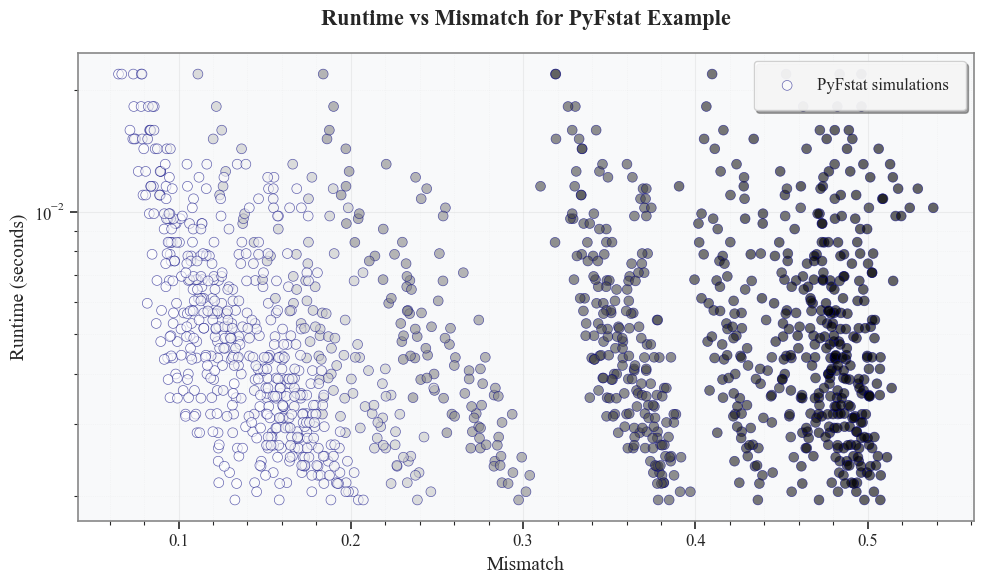

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12


# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(10, 6))

# Generate sample data (replace with your actual data)
# Note: In your actual implementation, use data_mean.mismatch and data_mean.runtime
np.random.seed(42)
# mismatch = np.random.uniform(0.07, 0.21, 500)
# runtime = np.exp(np.random.normal(-5, 0.7, 500))

# Create scatter plot with improved styling
# scatter = ax.scatter(data_mean.mismatch, data_mean.runtime, 
#                     alpha=0.6,                    # Add transparency
#                     s=50,                         # Slightly smaller points
#                     c='#1f77b4',                  # Professional blue color
#                     edgecolors='navy',            # Add edge color
#                     linewidth=0.5,                # Thin edge
#                     label='PyFstat simulations')   # More descriptive label

scatter = ax.scatter(data_mean.mismatch, data_mean.runtime, 
                    alpha=0.6,                    # Add transparency
                    s=50,                         # Slightly smaller points
                    c=np.log(data_mean.mf2),                  # Professional blue color
                    edgecolors='navy',            # Add edge color
                    linewidth=0.5,                # Thin edge
                    label='PyFstat simulations')   # More descriptive label

# Set logarithmic scale for y-axis
ax.set_yscale('log')
# ax.set_xscale('log')
# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title('Runtime vs Mismatch for PyFstat Example', 
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True, 
          shadow=True, framealpha=0.9, borderpad=1)

# Set axis limits with some padding
# ax.set_xlim(0.065, 0.215)
# ax.set_ylim(5e-3, 5e-1)

# Add statistical annotation (optional)
# You can add mean/median lines or other statistical information
# median_runtime = np.median(runtime)
# ax.axhline(y=median_runtime, color='red', linestyle='--', 
#            linewidth=1, alpha=0.5, label=f'Median: {median_runtime:.3f}s')

# Tight layout for better spacing
plt.tight_layout()

# Save the figure in high resolution
# plt.savefig('images/runtime_vs_mismatch.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('runtime_vs_mismatch.png', format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


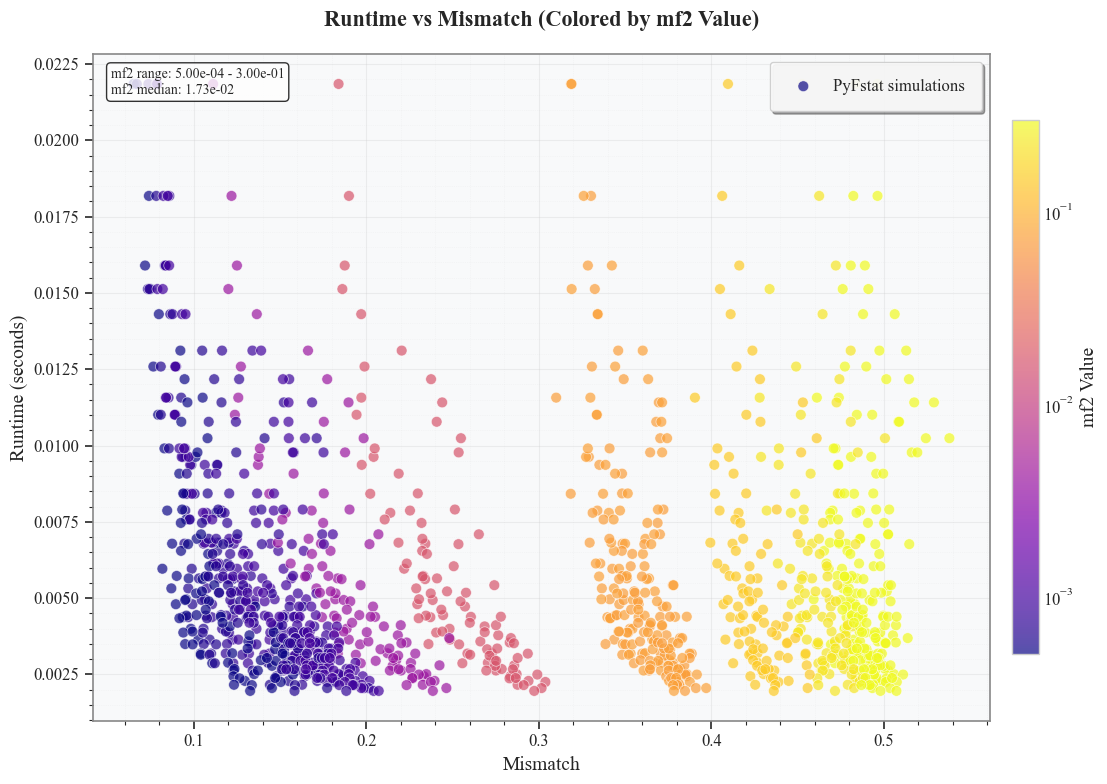

In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(12, 8))  # Larger to accommodate colorbar

# Create scatter plot with enhanced color mapping using mf2
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime,
                    alpha=0.7,                    # Good transparency for overlapping points
                    s=60,                         # Consistent point size
                    c=data_mean.mf2,              # Color represents mf2 values
                    cmap='plasma',               # Professional colormap (perceptually uniform)
                    norm=LogNorm(),               # Log normalization for mf2 (remove if linear scaling preferred)
                    edgecolors='white',           # White edges for better contrast
                    linewidth=0.5,
                    label='PyFstat simulations')

# Add colorbar for mf2 values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20, pad=0.02)
cbar.set_label('mf2 Value', fontsize=14, fontweight='medium')
cbar.ax.tick_params(labelsize=12)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title('Runtime vs Mismatch (Colored by mf2 Value)',
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True,
          shadow=True, framealpha=0.9, borderpad=1)

# Optional: Add statistics text box
mf2_stats = f'mf2 range: {data_mean.mf2.min():.2e} - {data_mean.mf2.max():.2e}\n'
mf2_stats += f'mf2 median: {data_mean.mf2.median():.2e}'
ax.text(0.02, 0.98, mf2_stats, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('images/runtime_vs_mismatch_mf2.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

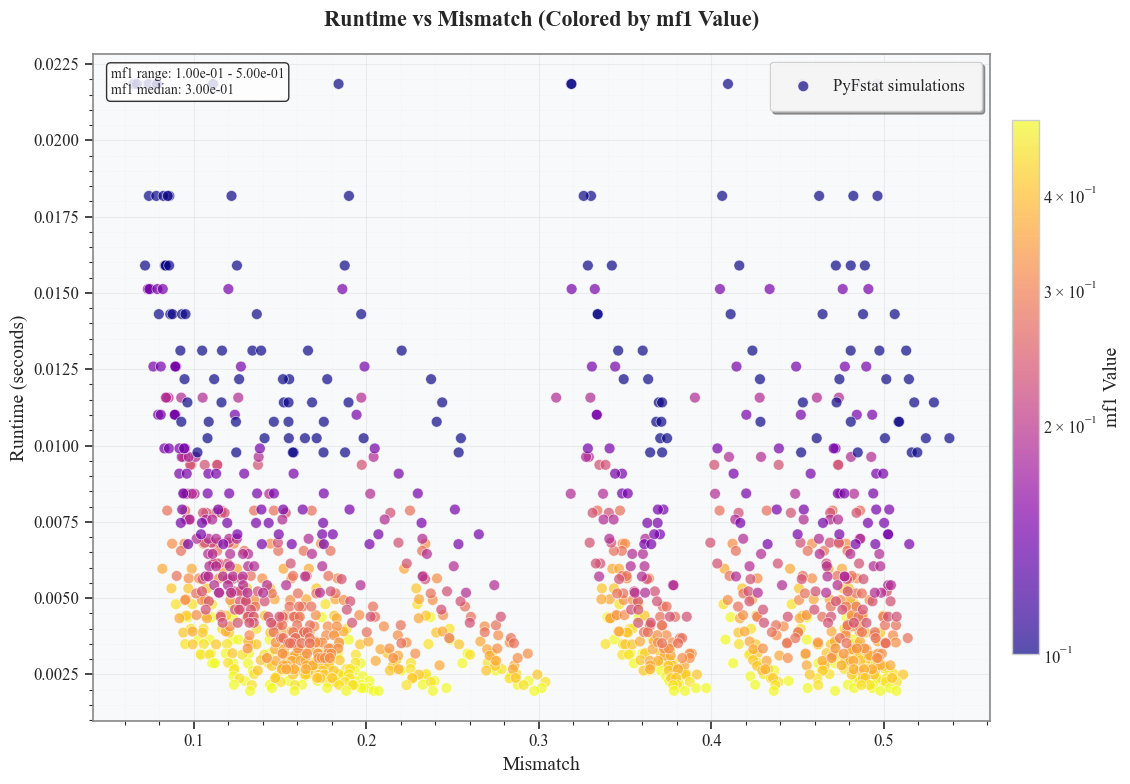

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(12, 8))  # Larger to accommodate colorbar

# Create scatter plot with enhanced color mapping using mf2
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime,
                    alpha=0.7,                    # Good transparency for overlapping points
                    s=60,                         # Consistent point size
                    c=data_mean.mf1,              # Color represents mf2 values
                    cmap='plasma',               # Professional colormap (perceptually uniform)
                    norm=LogNorm(),               # Log normalization for mf2 (remove if linear scaling preferred)
                    edgecolors='white',           # White edges for better contrast
                    linewidth=0.5,
                    label='PyFstat simulations')

# Add colorbar for mf2 values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20, pad=0.02)
cbar.set_label('mf1 Value', fontsize=14, fontweight='medium')
cbar.ax.tick_params(labelsize=12)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title('Runtime vs Mismatch (Colored by mf1 Value)',
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True,
          shadow=True, framealpha=0.9, borderpad=1)

# Optional: Add statistics text box
mf1_stats = f'mf1 range: {data_mean.mf1.min():.2e} - {data_mean.mf1.max():.2e}\n'
mf1_stats += f'mf1 median: {data_mean.mf1.median():.2e}'
ax.text(0.02, 0.98, mf1_stats, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('images/runtime_vs_mismatch_mf1.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


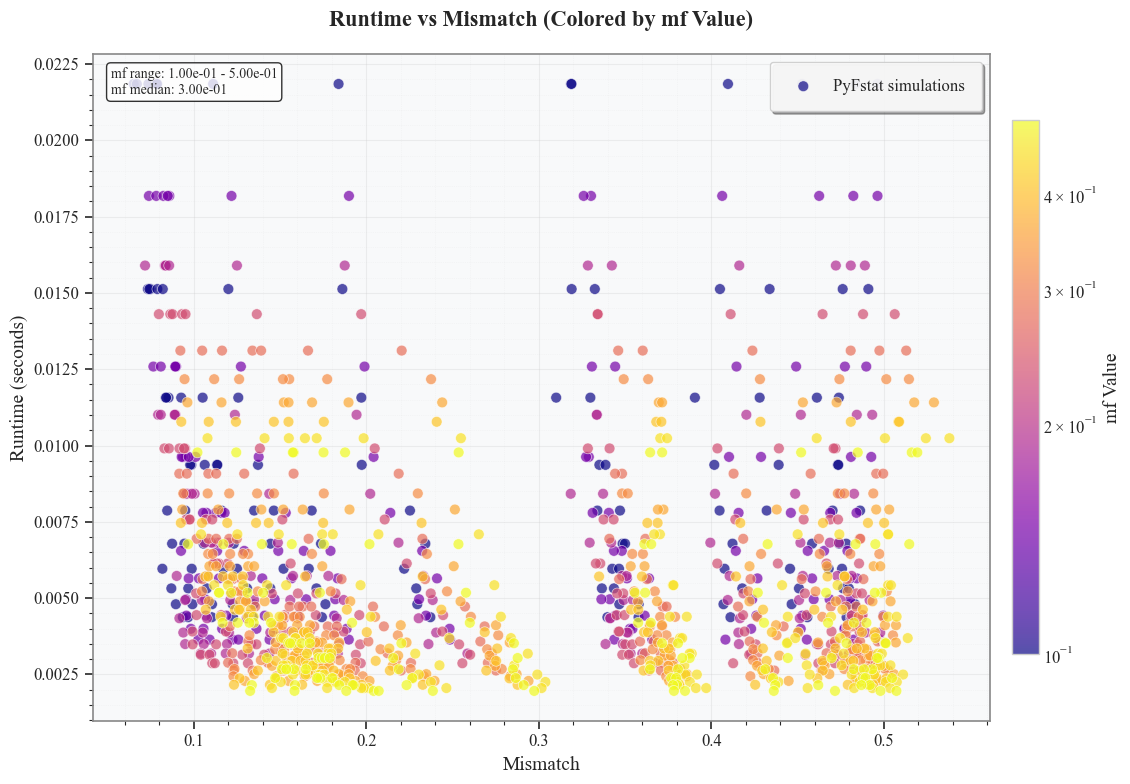

In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

# Set the default font and style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

# Create figure with specific size for publication
fig, ax = plt.subplots(figsize=(12, 8))  # Larger to accommodate colorbar

# Create scatter plot with enhanced color mapping using mf2
scatter = ax.scatter(data_mean.mismatch, data_mean.runtime,
                    alpha=0.7,                    # Good transparency for overlapping points
                    s=60,                         # Consistent point size
                    c=data_mean.mf,              # Color represents mf2 values
                    cmap='plasma',               # Professional colormap (perceptually uniform)
                    norm=LogNorm(),               # Log normalization for mf2 (remove if linear scaling preferred)
                    edgecolors='white',           # White edges for better contrast
                    linewidth=0.5,
                    label='PyFstat simulations')

# Add colorbar for mf2 values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, aspect=20, pad=0.02)
cbar.set_label('mf Value', fontsize=14, fontweight='medium')
cbar.ax.tick_params(labelsize=12)

# Set logarithmic scale for y-axis
# ax.set_yscale('log')

# Improve axis labels with units if applicable
ax.set_xlabel('Mismatch', fontsize=14, fontweight='medium')
ax.set_ylabel('Runtime (seconds)', fontsize=14, fontweight='medium')

# Add title with proper formatting
ax.set_title('Runtime vs Mismatch (Colored by mf Value)',
             fontsize=16, fontweight='bold', pad=20)

# Customize grid
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Add minor ticks for better readability
ax.minorticks_on()

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#888888')
    spine.set_linewidth(1.2)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=3)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Position legend optimally
ax.legend(loc='upper right', frameon=True, fancybox=True,
          shadow=True, framealpha=0.9, borderpad=1)

# Optional: Add statistics text box
mf_stats = f'mf range: {data_mean.mf.min():.2e} - {data_mean.mf.max():.2e}\n'
mf_stats += f'mf median: {data_mean.mf.median():.2e}'
ax.text(0.02, 0.98, mf_stats, transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('images/runtime_vs_mismatch_mf.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()
